# Dataset

In [ ]:
!wget https://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip

--2024-10-11 11:26:17--  https://people.csail.mit.edu/torralba/code/spatialenvelope/spatial_envelope_256x256_static_8outdoorcategories.zip
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.52.131.233
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135033638 (129M) [application/zip]
Saving to: ‘spatial_envelope_256x256_static_8outdoorcategories.zip’

spatial_envelope_25 100%[===================>] 128.78M  14.1MB/s    in 9.3s    

2024-10-11 11:26:27 (13.8 MB/s) - ‘spatial_envelope_256x256_static_8outdoorcategories.zip’ saved [135033638/135033638]



In [ ]:
!unzip spatial_envelope_256x256_static_8outdoorcategories.zip

Archive:  spatial_envelope_256x256_static_8outdoorcategories.zip
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_arnat59.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_art1130.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_art294.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_art487.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea1.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea10.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea14.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea2.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea20.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea24.jpg  
  inflating: spatial_envelope_256x256_static_8outdoorcategories/coast_bea26.jpg  
  inflating: spatial_envelope

In [ ]:
!rm spatial_envelope_256x256_static_8outdoorcategories/Thumbs.db

In [ ]:
!pip install ktrain
!pip install tensorflow
!pip install tf_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.4 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=cd732a33ce2f8a8253ab1031fa8c5d17ab133712774033046e4cc058d93f8a8e
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=ke

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ['DISABLE_V2_BEHAVIOR'] = '1'
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ['TF_USE_LEGACY_KERAS']="1"
import ktrain
from ktrain import vision as vis

Instructions for updating:
non-resource variables are not supported in the long term


Using DISABLE_V2_BEHAVIOR with TensorFlow


In [ ]:
from os import listdir
from os.path import isfile, join

dataset = 'spatial_envelope_256x256_static_8outdoorcategories/'

imagens = [f for f in listdir(dataset) if isfile(join(dataset, f)) and '.jpg' in f]
imagens

['insidecity_gre9.jpg',
 'coast_sun21.jpg',
 'insidecity_gre303.jpg',
 'mountain_n347078.jpg',
 'opencountry_n291048.jpg',
 'coast_natu822.jpg',
 'coast_nat643.jpg',
 'tallbuilding_urban16.jpg',
 'street_art766.jpg',
 'insidecity_urb464.jpg',
 'forest_cdmc284.jpg',
 'coast_nat908.jpg',
 'highway_bost290.jpg',
 'opencountry_n490067.jpg',
 'street_art1583.jpg',
 'coast_n291076.jpg',
 'opencountry_land276.jpg',
 'insidecity_hous36.jpg',
 'tallbuilding_urban1126.jpg',
 'forest_nat1088.jpg',
 'highway_nat520.jpg',
 'coast_natu649.jpg',
 'highway_gre658.jpg',
 'coast_natu642.jpg',
 'street_par94.jpg',
 'coast_land112.jpg',
 'forest_nat354.jpg',
 'mountain_land11.jpg',
 'highway_urb714.jpg',
 'highway_urb545.jpg',
 'opencountry_land691.jpg',
 'street_par155.jpg',
 'insidecity_hous39.jpg',
 'mountain_land30.jpg',
 'street_par99.jpg',
 'insidecity_a212024.jpg',
 'highway_gre685.jpg',
 'tallbuilding_urban1081.jpg',
 'insidecity_urb454.jpg',
 'mountain_n632073.jpg',
 'insidecity_a129048.jpg',
 'c

# Gerando treino e teste

In [ ]:
!mkdir -p data/train
!mkdir -p data/test

In [ ]:
from sklearn.model_selection import train_test_split
from shutil import copyfile
import os

x_train ,x_test = train_test_split(imagens,test_size=0.3)

for img in x_train:
  img_class = img.split('_')[0]

  if not os.path.exists('data/train/'+img_class):
      os.makedirs('data/train/'+img_class)

  copyfile(dataset+'/'+img, 'data/train/'+img_class+'/'+img)

for img in x_test:
  img_class = img.split('_')[0]

  if not os.path.exists('data/test/'+img_class):
      os.makedirs('data/test/'+img_class)

  copyfile(dataset+'/'+img, 'data/test/'+img_class+'/'+img)

In [ ]:
(train_data, val_data, preproc) = vis.images_from_folder('data/')

Found 1881 images belonging to 8 classes.
Found 807 images belonging to 8 classes.


# Treinando o Modelo

In [ ]:
vis.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
model = vis.image_classifier('pretrained_resnet50', train_data, val_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94765736/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [ ]:
for layer in model.layers:
  layer.trainable=True
  print(layer.name,layer.trainable)

input_1 True
conv1_pad True
conv1_conv True
conv1_bn True
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_relu True
conv3_block1_2_conv True
conv3_block1_2_bn True
conv3_block1

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
# wrap model and data in Learner object
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data,
                             workers=8, use_multiprocessing=False, batch_size=64)

In [ ]:
learner.fit_onecycle(0.00001, 10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
30/30 [==============================] - 14s 422ms/step - batch: 14.5000 - size: 62.7000 - loss: 0.7147 - acc: 0.7725 - val_loss: 0.5322 - val_acc: 0.8253
Epoch 2/2
30/30 [==============================] - 14s 486ms/step - batch: 14.5000 - size: 62.7000 - loss: 0.6940 - acc: 0.7868 - val_loss: 0.5076 - val_acc: 0.8302


# Explorando o Modelo

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
import random
random.shuffle(val_data.filenames)
val_data.filenames

['forest/forest_natc4.jpg',
 'highway/highway_gre657.jpg',
 'coast/coast_nat905.jpg',
 'mountain/mountain_land775.jpg',
 'tallbuilding/tallbuilding_urb992.jpg',
 'opencountry/opencountry_natu574.jpg',
 'coast/coast_nat799.jpg',
 'street/street_hexp4.jpg',
 'opencountry/opencountry_land233.jpg',
 'highway/highway_art254.jpg',
 'mountain/mountain_land680.jpg',
 'tallbuilding/tallbuilding_art232.jpg',
 'coast/coast_natu631.jpg',
 'highway/highway_gre144.jpg',
 'mountain/mountain_nat1207.jpg',
 'tallbuilding/tallbuilding_city7.jpg',
 'forest/forest_for116.jpg',
 'tallbuilding/tallbuilding_archi603.jpg',
 'opencountry/opencountry_fie25.jpg',
 'coast/coast_n672004.jpg',
 'highway/highway_nat550.jpg',
 'forest/forest_nat719.jpg',
 'tallbuilding/tallbuilding_archi317.jpg',
 'insidecity/insidecity_boston29.jpg',
 'mountain/mountain_nat1232.jpg',
 'street/street_hexp30.jpg',
 'tallbuilding/tallbuilding_urban982.jpg',
 'forest/forest_nat717.jpg',
 'mountain/mountain_n213056.jpg',
 'opencountry/op

In [ ]:
def show_prediction(fname):

    predicted = predictor.predict_filename(fname)[0]
    vis.show_image(fname)
    print('predicted:%s | actual: %s' % (predicted, fname))

predicted:tallbuilding | actual: data/test/tallbuilding/tallbuilding_art1022.jpg


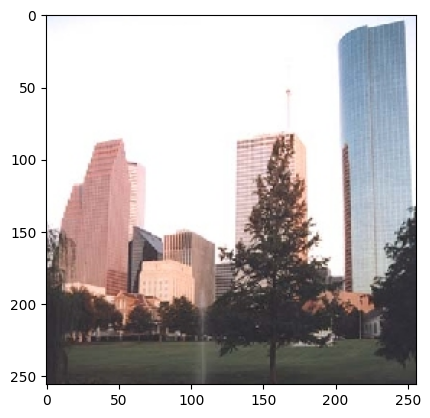

In [ ]:
show_prediction( 'data/test/tallbuilding/tallbuilding_art1022.jpg')

In [ ]:
!pip install https://github.com/amaiya/eli5-tf/archive/refs/heads/master.zip

     | 6.9 MB 12.4 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=108164 sha256=ed203692c8ec2c66a9ee3c7225b624bc828089deba659f3495e50bf4a8b1c776
  Stored in directory: /tmp/pip-ephem-wheel-cache-__12t07v/wheels/0b/14/54/23c07f7254b733dc3daac99ba1fda60e30f1b2991b3b8ee0bf
Successfully built eli5


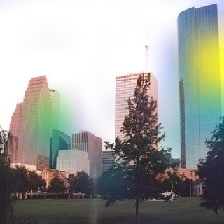

In [ ]:
predictor.explain('data/test/tallbuilding/tallbuilding_art1022.jpg')